In [53]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from PIL import *
import cv2

#function determin the thresholding
def doThreshold (rmean , frame):
    if (rmean > 241):
        print ('day '+str (frame+1)+' MEAN reflectance: '+ str(rmean)+ " Status: Unripe.")
    elif (rmean <= 241 and rmean > 236):
        print ('day '+str (frame+1)+' MEAN reflectance: '+ str(rmean)+ " Status: Perfectly ripe.")
    elif (rmean < 236):
        print ('day '+str (frame+1)+' MEAN reflectance: '+ str(rmean)+ " Status: Overripe.")

# Function which updates the plot frame by frame
def draw_animation(frame, avodata): 
    plt.clf()
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Reflectance")
    #plt.ylim(0, 100)

    # start and stop band which the mean calculations are focsed 
    startBand = 0
    stopBand =100
    
    single_band_data = avodata[frame][:, :, 223]
    im = np.asarray(single_band_data* 255 , dtype='uint8')
    # extracting image data for kmeans algorithm
    # default values as Parameters for corner detection
    blockSize = 2 
    ksize = 3      
    k = 0.04   


    # finding corners from corner harris
    corners = cv2.cornerHarris(single_band_data, blockSize, ksize, k)
    # Find bounding box around the corners
    non_zero = np.where(corners > 0.01 * corners.max())
    x, y, w, h = np.min(non_zero[1]), np.min(non_zero[0]), np.max(non_zero[1]) - np.min(non_zero[1]), np.max(non_zero[0]) - np.min(non_zero[0])
    
    avo_reg= single_band_data[y:y+h, x:x+w]
    mean_intensity = np.mean(avo_reg)
    
    threshold_val  = int (mean_intensity)
    ret, mask = cv2.threshold(single_band_data, threshold_val, 255, cv2.THRESH_BINARY)
    cv2.bitwise_and
    
    # ret, mask = cv2.threshold(im, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # cv2.bitwise_and
    current_data = avodata[frame]

    title = f'mean - Day {frame}'
    plt.title(title)
    Meval = 0
    Meanval = []
# Sample data for demonstration
    for i in range(startBand, stopBand):
        img = current_data.read_band(i)
        
        masked_image = img.copy()
        masked_image[mask == 0] = 0
        me = np.mean(masked_image[mask> 0])
        Meval += me
        Meanval.append(me)
        
        
    rmean  = Meval/100
    
    # as the recorded data for day 6 and 7 is not available 
    if (frame+1 > 5):
        frame = frame +2
    
    
    doThreshold(rmean, frame)
    
    Meanval = np.array(Meanval) 
    plt.plot(range(startBand,stopBand), Meanval, color='green', label='mean Pixel Value')
    plt.ylim(200,300)
    plt.xlabel('bands')
    plt.ylabel('Pixel Value')
    plt.title('Avocado Reflectance of day '+ str(frame+1))
    plt.grid(True)
    



day 1 MEAN reflectance: 246.3888655090332 Status: Unripe.
day 1 MEAN reflectance: 246.3888655090332 Status: Unripe.
day 2 MEAN reflectance: 245.64269577026369 Status: Unripe.
day 3 MEAN reflectance: 241.57880126953125 Status: Unripe.
day 4 MEAN reflectance: 240.87230773925782 Status: Perfectly ripe.
day 5 MEAN reflectance: 240.23869232177734 Status: Perfectly ripe.
day 8 MEAN reflectance: 235.2064306640625 Status: Overripe.
day 9 MEAN reflectance: 235.17894348144532 Status: Overripe.


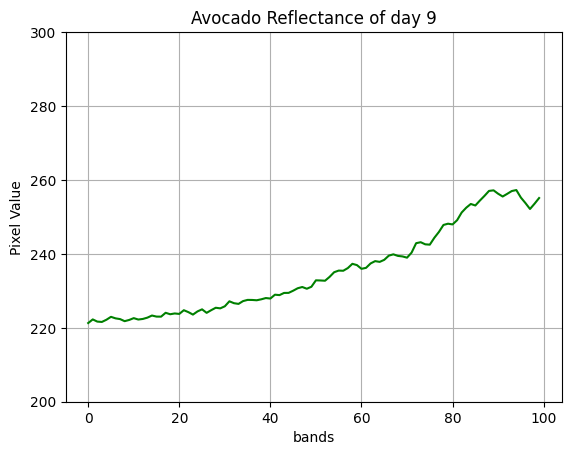

In [54]:
from hyperAvodata_f1_front import avocado_f1_front
import matplotlib.pyplot as plt
# Set up the figure and initial plot
graph_front, sp = plt.subplots()
# Creating the animation
total_frames = 7
ani = FuncAnimation(graph_front, draw_animation, fargs=(avocado_f1_front,), frames=total_frames, interval=500, repeat=False)


# Saving the animation as gif
ani.save('fruit1_front.gif', writer='pillow')


# Display the animation
plt.show()

day 1 MEAN reflectance: 241.6311671447754 Status: Unripe.
day 1 MEAN reflectance: 241.6311671447754 Status: Unripe.
day 2 MEAN reflectance: 240.91874710083007 Status: Perfectly ripe.
day 3 MEAN reflectance: 238.26942810058594 Status: Perfectly ripe.
day 4 MEAN reflectance: 238.34311279296875 Status: Perfectly ripe.
day 5 MEAN reflectance: 236.5416554260254 Status: Perfectly ripe.
day 8 MEAN reflectance: 235.05789489746093 Status: Overripe.
day 9 MEAN reflectance: 233.24847076416015 Status: Overripe.


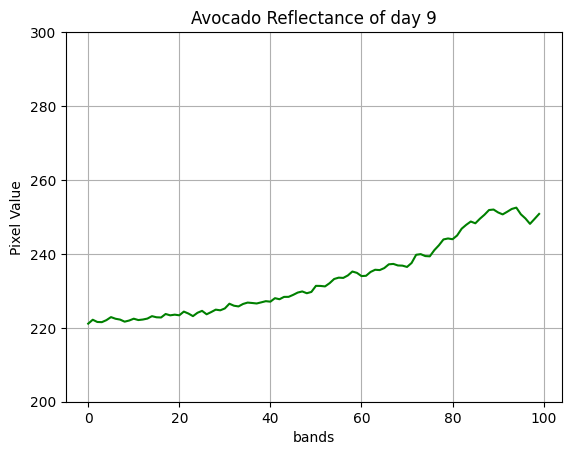

In [55]:
from hyperAvodata_f1_back import avocado_f1_back
import matplotlib.pyplot as plt
# Set up the figure and initial plot
graph_front, sp = plt.subplots()
# Creating the animation
total_frames = 7
ani = FuncAnimation(graph_front, draw_animation, fargs=(avocado_f1_back,), frames=total_frames, interval=500, repeat=False)


# Saving the animation as gif
ani.save('fruit1_back.gif', writer='pillow')


# Display the animation
plt.show()

day 1 MEAN reflectance: 247.52310134887696 Status: Unripe.
day 1 MEAN reflectance: 247.52310134887696 Status: Unripe.
day 2 MEAN reflectance: 249.36359100341798 Status: Unripe.
day 3 MEAN reflectance: 244.67507598876952 Status: Unripe.
day 4 MEAN reflectance: 239.94313674926758 Status: Perfectly ripe.
day 5 MEAN reflectance: 239.488212890625 Status: Perfectly ripe.
day 8 MEAN reflectance: 235.050018157959 Status: Overripe.
day 9 MEAN reflectance: 236.44203125 Status: Perfectly ripe.


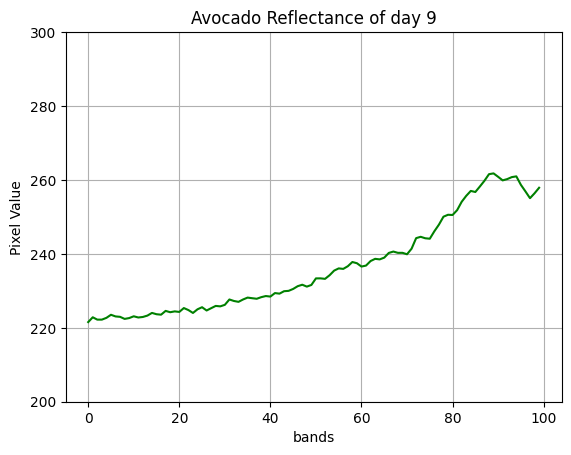

In [56]:
from hyperAvodata_f2_back import avocado_f2_back
import matplotlib.pyplot as plt
# Set up the figure and initial plot
graph_front, sp = plt.subplots()
# Creating the animation
total_frames = 7
ani = FuncAnimation(graph_front, draw_animation, fargs=(avocado_f2_back,), frames=total_frames, interval=500, repeat=False)


# Saving the animation as gif
ani.save('fruit2_back.gif', writer='pillow')


# Display the animation
plt.show()

day 1 MEAN reflectance: 247.5923223876953 Status: Unripe.
day 1 MEAN reflectance: 247.5923223876953 Status: Unripe.
day 2 MEAN reflectance: 253.91015502929687 Status: Unripe.
day 3 MEAN reflectance: 244.7407942199707 Status: Unripe.
day 4 MEAN reflectance: 241.61455291748047 Status: Unripe.
day 5 MEAN reflectance: 239.51146102905273 Status: Perfectly ripe.
day 8 MEAN reflectance: 235.13831115722655 Status: Overripe.
day 9 MEAN reflectance: 234.55463653564453 Status: Overripe.


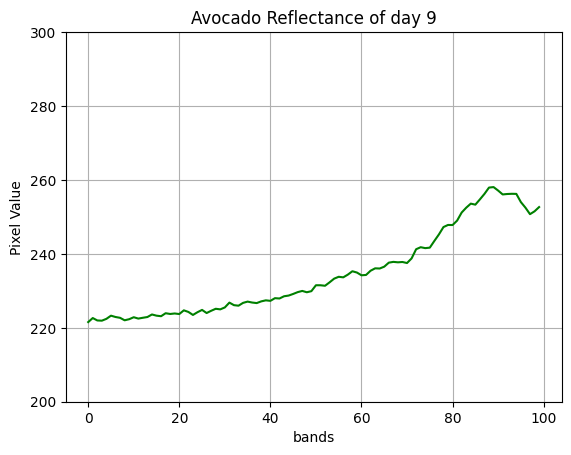

In [57]:
from hyperAvodata_f2_front import avocado_f2_front
import matplotlib.pyplot as plt
# Set up the figure and initial plot
graph_front, sp = plt.subplots()
# Creating the animation
total_frames = 7
ani = FuncAnimation(graph_front, draw_animation, fargs=(avocado_f2_front,), frames=total_frames, interval=500, repeat=False)


# Saving the animation as gif
ani.save('fruit2_front.gif', writer='pillow')


# Display the animation
plt.show()

day 1 MEAN reflectance: 244.61593963623048 Status: Unripe.
day 1 MEAN reflectance: 244.61593963623048 Status: Unripe.
day 2 MEAN reflectance: 243.63191192626954 Status: Unripe.
day 3 MEAN reflectance: 239.65690322875977 Status: Perfectly ripe.
day 4 MEAN reflectance: 237.02306442260743 Status: Perfectly ripe.
day 5 MEAN reflectance: 236.5262351989746 Status: Perfectly ripe.
day 8 MEAN reflectance: 233.86727935791015 Status: Overripe.
day 9 MEAN reflectance: 232.60194747924805 Status: Overripe.


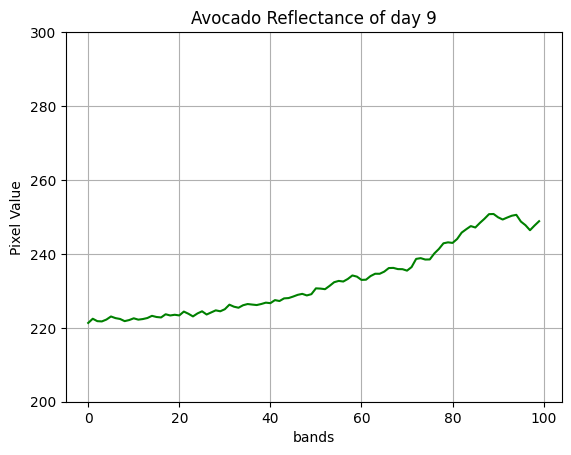

In [58]:
from hyperAvodata_f3_front import avocado_f3_front
import matplotlib.pyplot as plt
# Set up the figure and initial plot
graph_front, sp = plt.subplots()
# Creating the animation
total_frames = 7
ani = FuncAnimation(graph_front, draw_animation, fargs=(avocado_f3_front,), frames=total_frames, interval=500, repeat=False)


# Saving the animation as gif
ani.save('fruit3_front.gif', writer='pillow')


# Display the animation
plt.show()

day 1 MEAN reflectance: 240.71550735473633 Status: Perfectly ripe.
day 1 MEAN reflectance: 240.71550735473633 Status: Perfectly ripe.
day 2 MEAN reflectance: 239.68145935058592 Status: Perfectly ripe.
day 3 MEAN reflectance: 237.41295196533204 Status: Perfectly ripe.
day 4 MEAN reflectance: 235.197071685791 Status: Overripe.
day 5 MEAN reflectance: 234.46843414306642 Status: Overripe.
day 8 MEAN reflectance: 232.7045883178711 Status: Overripe.
day 9 MEAN reflectance: 232.85819473266602 Status: Overripe.


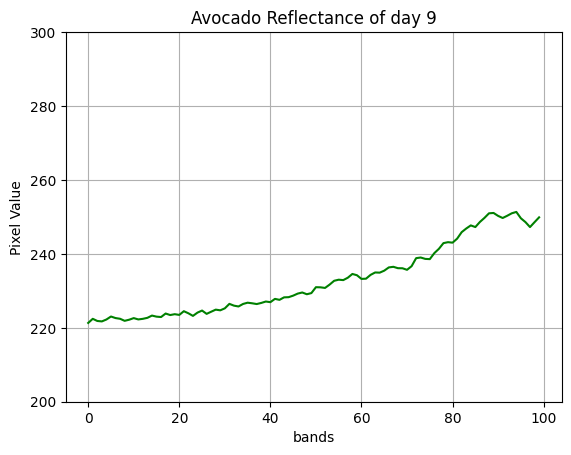

In [59]:
from hyperAvodata_f3_back import avocado_f3_back
import matplotlib.pyplot as plt
# Set up the figure and initial plot
graph_front, sp = plt.subplots()
# Creating the animation
total_frames = 7
ani = FuncAnimation(graph_front, draw_animation, fargs=(avocado_f3_back,), frames=total_frames, interval=500, repeat=False)


# Saving the animation as gif
ani.save('fruit3_back.gif', writer='pillow')


# Display the animation
plt.show()

day 1 MEAN reflectance: 246.93408767700194 Status: Unripe.
day 1 MEAN reflectance: 246.93408767700194 Status: Unripe.
day 2 MEAN reflectance: 247.67748123168946 Status: Unripe.
day 3 MEAN reflectance: 246.41232391357423 Status: Unripe.
day 4 MEAN reflectance: 243.26483154296875 Status: Unripe.
day 5 MEAN reflectance: 242.51825271606447 Status: Unripe.
day 8 MEAN reflectance: 234.15928100585938 Status: Overripe.
day 9 MEAN reflectance: 235.44706146240233 Status: Overripe.


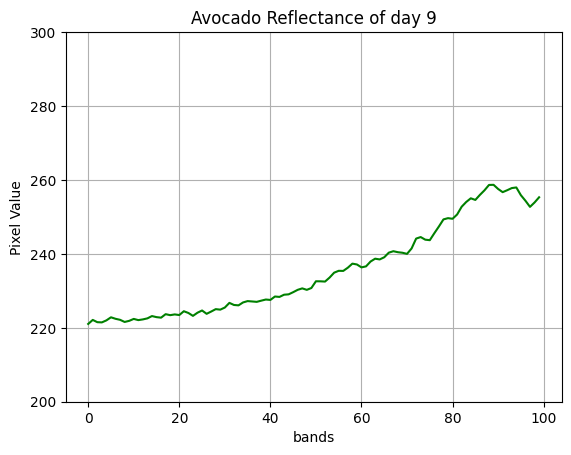

In [60]:
from hyperAvodata_f4_back import avocado_f4_back
import matplotlib.pyplot as plt
# Set up the figure and initial plot
graph_front, sp = plt.subplots()
# Creating the animation
total_frames = 7
ani = FuncAnimation(graph_front, draw_animation, fargs=(avocado_f4_back,), frames=total_frames, interval=500, repeat=False)


# Saving the animation as gif
ani.save('fruit4_back.gif', writer='pillow')


# Display the animation
plt.show()

day 1 MEAN reflectance: 243.35680557250976 Status: Unripe.
day 1 MEAN reflectance: 243.35680557250976 Status: Unripe.
day 2 MEAN reflectance: 242.8214602661133 Status: Unripe.
day 3 MEAN reflectance: 242.4616456604004 Status: Unripe.
day 4 MEAN reflectance: 239.5559098815918 Status: Perfectly ripe.
day 5 MEAN reflectance: 238.57110580444336 Status: Perfectly ripe.
day 8 MEAN reflectance: 233.3743391418457 Status: Overripe.
day 9 MEAN reflectance: 235.39611282348633 Status: Overripe.


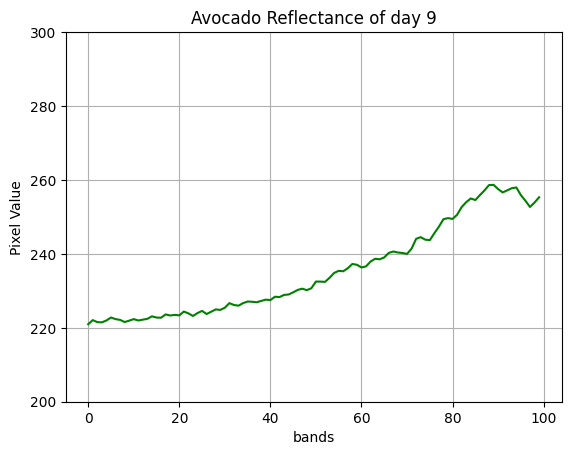

In [61]:
from hyperAvodata_f4_front import avocado_f4_front
import matplotlib.pyplot as plt
# Set up the figure and initial plot
graph_front, sp = plt.subplots()
# Creating the animation
total_frames = 7
ani = FuncAnimation(graph_front, draw_animation, fargs=(avocado_f4_front,), frames=total_frames, interval=500, repeat=False)


# Saving the animation as gif
ani.save('fruit4_front.gif', writer='pillow')


# Display the animation
plt.show()

day 1 MEAN reflectance: 245.2510316467285 Status: Unripe.
day 1 MEAN reflectance: 245.2510316467285 Status: Unripe.
day 2 MEAN reflectance: 244.16136337280273 Status: Unripe.
day 3 MEAN reflectance: 246.62119842529296 Status: Unripe.
day 4 MEAN reflectance: 238.22392486572267 Status: Perfectly ripe.
day 5 MEAN reflectance: 236.6661882019043 Status: Perfectly ripe.
day 8 MEAN reflectance: 233.51345458984375 Status: Overripe.
day 9 MEAN reflectance: 231.93140625 Status: Overripe.


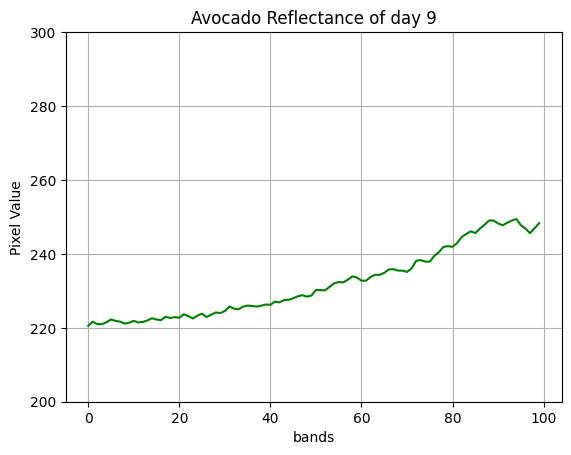

In [62]:
from hyperAvodata_f5_back import avocado_f5_back
import matplotlib.pyplot as plt
# Set up the figure and initial plot
graph_front, sp = plt.subplots()
# Creating the animation
total_frames = 7
ani = FuncAnimation(graph_front, draw_animation, fargs=(avocado_f5_back,), frames=total_frames, interval=500, repeat=False)


# Saving the animation as gif
ani.save('fruit5_back.gif', writer='pillow')


# Display the animation
plt.show()

/home/sayan/test/env/lib/python3.10/site-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


day 1 MEAN reflectance: 245.40723480224608 Status: Unripe.
day 1 MEAN reflectance: 245.40723480224608 Status: Unripe.
day 2 MEAN reflectance: 243.1257421875 Status: Unripe.
day 3 MEAN reflectance: 240.4895327758789 Status: Perfectly ripe.
day 4 MEAN reflectance: 237.73758193969726 Status: Perfectly ripe.
day 5 MEAN reflectance: 235.52729049682617 Status: Overripe.
day 8 MEAN reflectance: 232.11899887084962 Status: Overripe.
day 9 MEAN reflectance: 231.9944532775879 Status: Overripe.


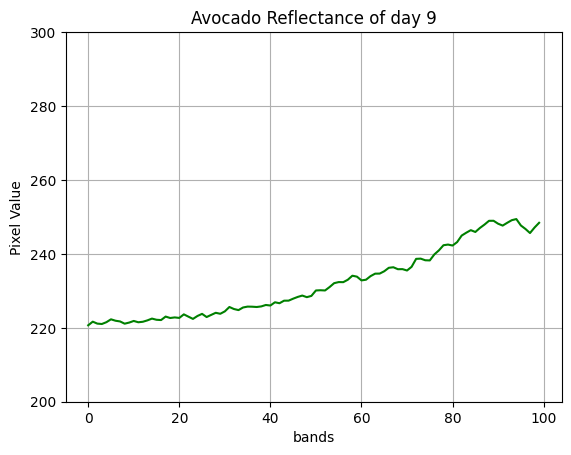

In [63]:
from hyperAvodata_f5_front import avocado_f5_front
import matplotlib.pyplot as plt
# Set up the figure and initial plot
graph_front, sp = plt.subplots()
# Creating the animation
total_frames = 7
ani = FuncAnimation(graph_front, draw_animation, fargs=(avocado_f5_front,), frames=total_frames, interval=500, repeat=False)


# Saving the animation as gif
ani.save('fruit5_front.gif', writer='pillow')


# Display the animation
plt.show()